**Goal of the notebook** : 

Familiarization with Seattle's environmental data in order to implement prediction models targeting 2 features :
- Greenhouses gases emissions.
- The total consumption of energy.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

**Table of contents**<a id='toc0_'></a>    
- 1. [Opening the data set](#toc1_)    
  - 1.1. [Missing values](#toc1_1_)    
  - 1.2. [astype category](#toc1_2_)    
  - 1.3. [Identifying what seems reliable in the data set](#toc1_3_)    
- 2. [Univariate analysis](#toc2_)    
  - 2.1. [Building Type](#toc2_1_)    
  - 2.2. [Primary Property Type](#toc2_2_)    
  - 2.3. [Zip Code](#toc2_3_)    
  - 2.4. [Year Built (or complete renovation)](#toc2_4_)    
  - 2.5. [Neighborhood](#toc2_5_)    
  - 2.6. [Number of Buildings in the property](#toc2_6_)    
  - 2.7. [Number of floors](#toc2_7_)    
  - 2.8. [Property GFA Building(s)](#toc2_8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Opening the data set

Some info on the data set:

Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle.This update to the benchmarking mandate was passed by Seattle City Council on February 29, 2016.

In [2]:
data = pd.read_csv('./2016_Building_Energy_Benchmarking.csv',
                   index_col='OSEBuildingID')
display(data.head())
data.shape

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


(3376, 45)

## 1.1.  [&#9650;](#toc0_) <a id='toc1_1_'></a>Missing values

<AxesSubplot: >

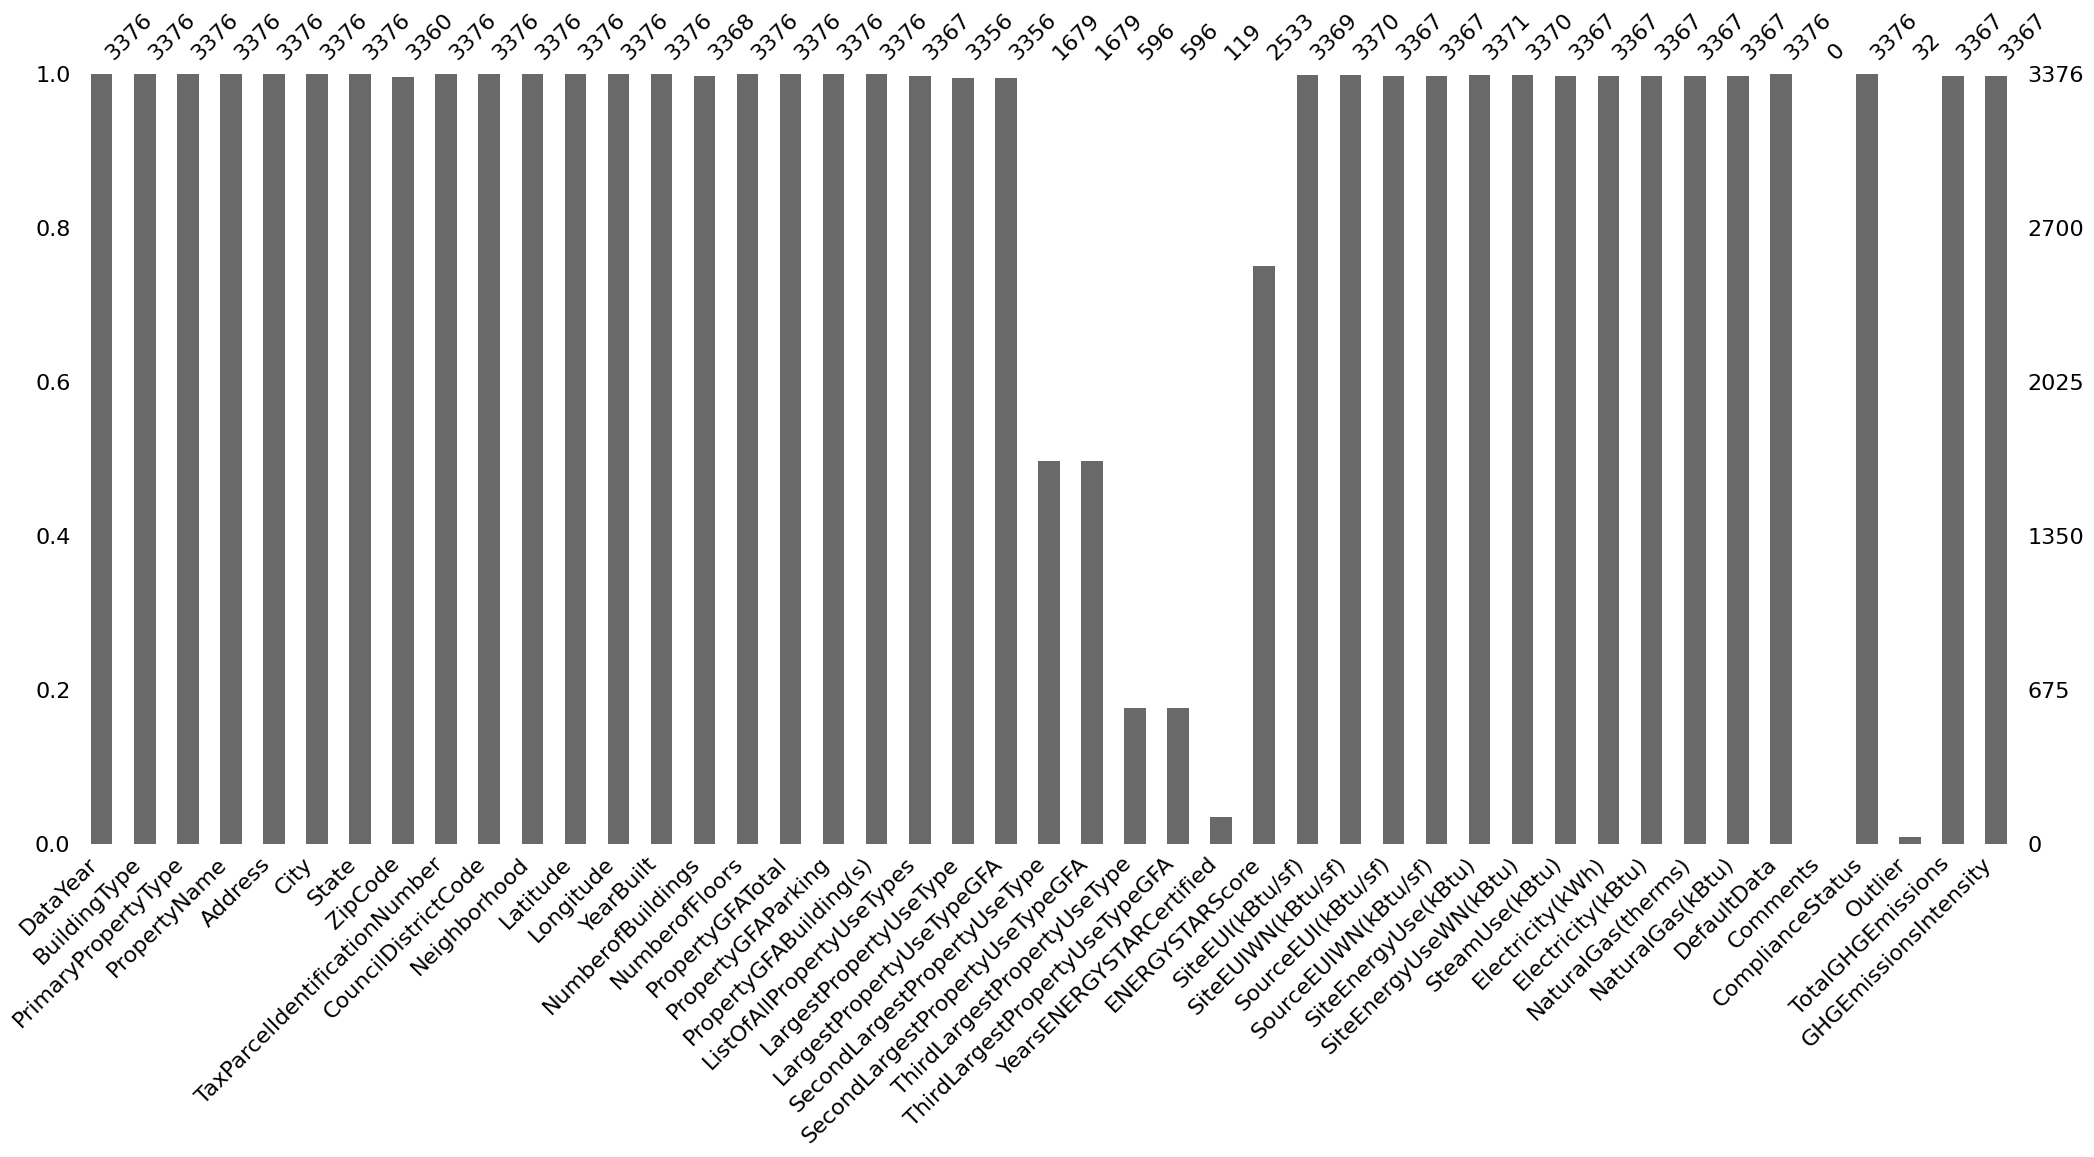

In [10]:
msno.bar(data)

- According [data descriptions](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy), GFA means Gross Floor Area.  
- It is normal to find some missing value for second and third use type of a property. When the property has only one use type.
- About 50 % of the properties have several use types.
- A Building with no ENERGYSTAR certification probably has a missing values in 'YearsENERGYSTARCertified'. So not much are certified.
- ENERGYSTARScore is an on going score calculation doing by colleagues.
- there is no information in 'Comments'.



In [7]:
data = data.drop('Comments', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   City                             3376 non-null   object 
 6   State                            3376 non-null   object 
 7   ZipCode                          3360 non-null   float64
 8   TaxParcelIdentificationNumber    3376 non-null   object 
 9   CouncilDistrictCode              3376 non-null   int64  
 10  Neighborhood                     3376 non-null   object 
 11  Latitude                         3376 non-null   float64
 12  Longitude          

## 1.2.  [&#9650;](#toc0_) <a id='toc1_2_'></a>astype category

In [18]:
# Searching features that could be cast to categories
for col in data.columns:
    print(f"{col} : {data[col].nunique()} / {data[col].dtype} - {round(data[col].notnull().mean()*100, 2)} %")

DataYear : 1 / int64 - 100.0 %
BuildingType : 8 / object - 100.0 %
PrimaryPropertyType : 24 / object - 100.0 %
PropertyName : 3362 / object - 100.0 %
Address : 3354 / object - 100.0 %
City : 1 / object - 100.0 %
State : 1 / object - 100.0 %
ZipCode : 55 / float64 - 99.53 %
TaxParcelIdentificationNumber : 3268 / object - 100.0 %
CouncilDistrictCode : 7 / int64 - 100.0 %
Neighborhood : 19 / object - 100.0 %
Latitude : 2876 / float64 - 100.0 %
Longitude : 2656 / float64 - 100.0 %
YearBuilt : 113 / int64 - 100.0 %
NumberofBuildings : 17 / float64 - 99.76 %
NumberofFloors : 50 / int64 - 100.0 %
PropertyGFATotal : 3195 / int64 - 100.0 %
PropertyGFAParking : 496 / int64 - 100.0 %
PropertyGFABuilding(s) : 3193 / int64 - 100.0 %
ListOfAllPropertyUseTypes : 466 / object - 99.73 %
LargestPropertyUseType : 56 / object - 99.41 %
LargestPropertyUseTypeGFA : 3122 / float64 - 99.41 %
SecondLargestPropertyUseType : 50 / object - 49.73 %
SecondLargestPropertyUseTypeGFA : 1352 / float64 - 49.73 %
ThirdLa

'City', 'DataYear' and 'State' have the same value for each building. It will not be relevant for prediction.

In [23]:
categories = ['BuildingType',
              'PrimaryPropertyType',
              'City',
              'State',
              'Neighborhood',
              'ComplianceStatus']


for cat in categories:
    data[cat] = data[cat].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   DataYear                         3376 non-null   int64   
 1   BuildingType                     3376 non-null   category
 2   PrimaryPropertyType              3376 non-null   category
 3   PropertyName                     3376 non-null   object  
 4   Address                          3376 non-null   object  
 5   City                             3376 non-null   category
 6   State                            3376 non-null   category
 7   ZipCode                          3360 non-null   float64 
 8   TaxParcelIdentificationNumber    3376 non-null   object  
 9   CouncilDistrictCode              3376 non-null   int64   
 10  Neighborhood                     3376 non-null   category
 11  Latitude                         3376 non-null   float64 
 12  Longi

## 1.3.  [&#9650;](#toc0_) <a id='toc1_3_'></a>Identifying what seems reliable in the data set

In [21]:
fts = ['DefaultData',
       'ComplianceStatus',
       'Outlier']

for ft in fts:
    print(ft)
    display(data[ft].value_counts())

DefaultData


False    3263
True      113
Name: DefaultData, dtype: int64

ComplianceStatus


Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

Outlier


Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

Only compliant buildings could be used. If so, we do not lose to much data and data are complete and safe to use for prediction.

In [25]:
# Outliers are in compliant buildings ?
data.loc[data.Outlier.notnull(), ['ComplianceStatus', 'Outlier']]

,ComplianceStatus,Outlier
OSEBuildingID,,
350,Non-Compliant,High outlier
539,Non-Compliant,Low outlier
608,Non-Compliant,Low outlier
704,Non-Compliant,High outlier
19708,Non-Compliant,Low outlier
19934,Non-Compliant,Low outlier
19967,Error - Correct Default Data,Low outlier
20367,Non-Compliant,Low outlier
20617,Error - Correct Default Data,Low outlier


All outliers **are not** in compliant buildings. selecting on ComplianceStatus is enough.

In [3]:
data = data.loc[data.ComplianceStatus == 'Compliant', :]
data.shape

(3211, 45)

# 2.  [&#9650;](#toc0_) <a id='toc2_'></a>Univariate analysis

In [29]:
data.columns 

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGE

## 2.1.  [&#9650;](#toc0_) <a id='toc2_1_'></a>Building Type

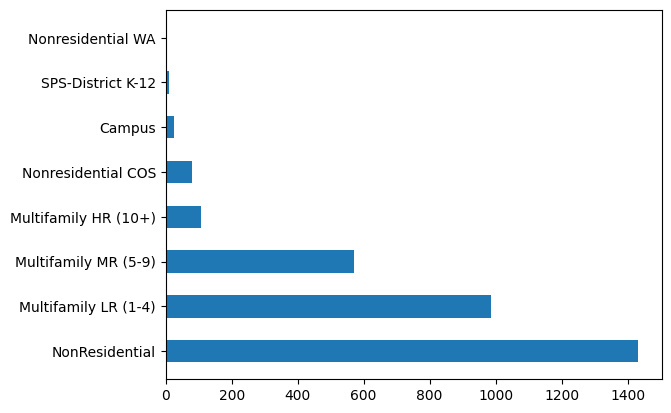

In [41]:
top = data.BuildingType.value_counts().head(10)
plt.barh(top.index, top.values, 0.5)
plt.show()

## 2.2.  [&#9650;](#toc0_) <a id='toc2_2_'></a>Primary Property Type

Low-Rise Multifamily           956
Mid-Rise Multifamily           553
Small- and Mid-Sized Office    287
Other                          250
Warehouse                      185
Large Office                   169
Mixed Use Property             132
High-Rise Multifamily          103
Retail Store                    85
Hotel                           76
Worship Facility                69
Distribution Center             53
K-12 School                     50
Senior Care Community           44
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Hospital                        10
Office                           0
Name: PrimaryPropertyType, dtype: int64

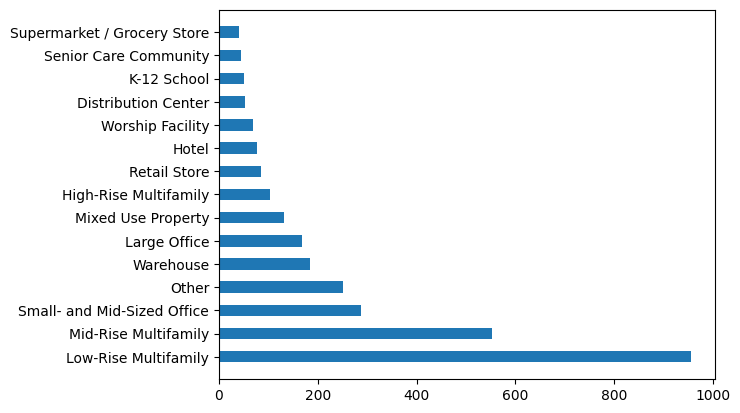

In [55]:
display(data.PrimaryPropertyType.value_counts())
top = data.PrimaryPropertyType.value_counts().head(15)
plt.barh(top.index, top.values, 0.5)
plt.show()

## 2.3.  [&#9650;](#toc0_) <a id='toc2_3_'></a>Zip Code

98109.0    291
98104.0    243
98122.0    234
98101.0    223
98134.0    184
98105.0    183
98121.0    182
98102.0    164
98119.0    163
98103.0    152
98125.0    142
98108.0    120
98115.0    118
98133.0    118
98107.0     99
98144.0     90
98116.0     81
98118.0     69
98199.0     68
98112.0     62
98126.0     59
98106.0     45
98136.0     27
98117.0     25
98195.0     10
98146.0      5
98155.0      4
98111.0      3
98178.0      2
98013.0      2
98177.0      2
98124.0      2
98164.0      2
98168.0      2
98154.0      2
98006.0      1
98272.0      1
98020.0      1
98204.0      1
98040.0      1
98113.0      1
98198.0      1
98011.0      1
98165.0      1
98070.0      1
98127.0      1
98114.0      1
98033.0      1
98028.0      1
98191.0      1
98012.0      1
98185.0      1
98053.0      1
98181.0      1
98145.0      1
Name: ZipCode, dtype: int64

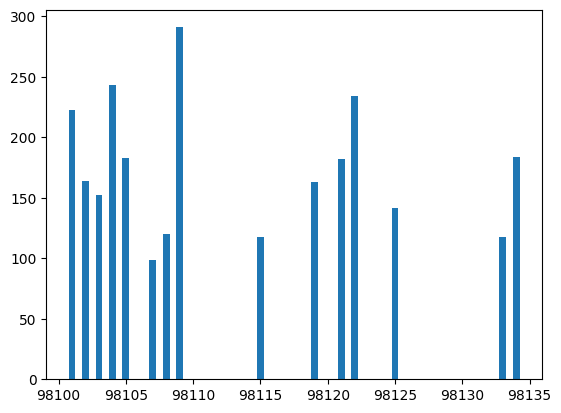

In [57]:
display(data.ZipCode.value_counts())
a = data.ZipCode.value_counts().head(15)
plt.bar(a.index, a.values, 0.5)
plt.show()

## 2.4.  [&#9650;](#toc0_) <a id='toc2_4_'></a>Year Built (or complete renovation)

2014    67
2000    67
1968    62
1988    60
2008    60
        ..
1932     3
1944     2
1939     2
1936     1
1935     1
Name: YearBuilt, Length: 113, dtype: int64

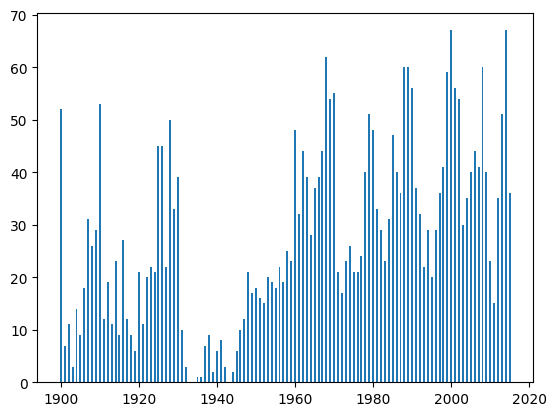

count    3211.000000
mean     1968.739645
std        33.163544
min      1900.000000
25%      1948.000000
50%      1975.000000
75%      1997.000000
max      2015.000000
Name: YearBuilt, dtype: float64

In [64]:
display(data.YearBuilt.value_counts())
a = data.YearBuilt.value_counts()
plt.bar(a.index, a.values, 0.5)
plt.show()
data.YearBuilt.describe()

## 2.5.  [&#9650;](#toc0_) <a id='toc2_5_'></a>Neighborhood

DOWNTOWN                  556
EAST                      440
MAGNOLIA / QUEEN ANNE     412
GREATER DUWAMISH          357
NORTHEAST                 266
LAKE UNION                244
NORTHWEST                 198
SOUTHWEST                 149
NORTH                     136
BALLARD                   120
CENTRAL                    95
SOUTHEAST                  78
DELRIDGE                   73
North                      40
Central                    26
Northwest                  10
Ballard                     6
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

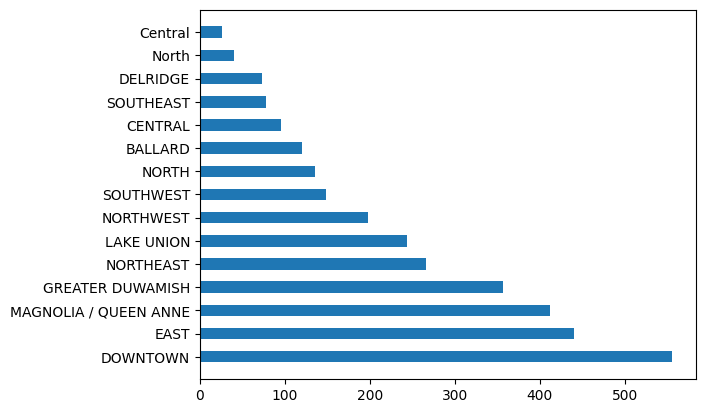

In [50]:
display(data.Neighborhood.value_counts())
top = data.Neighborhood.value_counts().head(15)
plt.barh(top.index, top.values, 0.5)
plt.show()

## 2.6.  [&#9650;](#toc0_) <a id='toc2_6_'></a>Number of Buildings in the property

1.0      3018
0.0        91
2.0        36
3.0        22
4.0        12
5.0         9
6.0         5
8.0         3
10.0        2
14.0        2
9.0         2
7.0         1
11.0        1
16.0        1
23.0        1
27.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

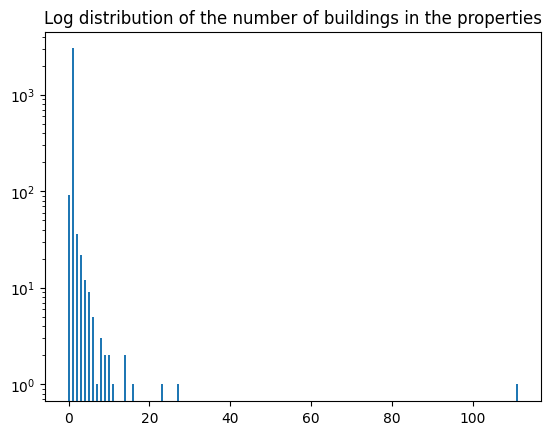

count    3208.000000
mean        1.110973
std         2.158983
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [26]:
display(data.NumberofBuildings.value_counts())
a = data.NumberofBuildings.value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title("Log distribution of the number of buildings in the properties")
plt.show()
data.NumberofBuildings.describe()

In [27]:
# Who is the top outlier?
data.loc[data.NumberofBuildings == 111]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,...,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


In [31]:
# Properties with no buildings although there is at least 20 000 sq. ft.?
df = data.loc[data.NumberofBuildings == 0]
print(df.shape)
df.sample(10)

(91, 45)


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
26706,2016,NonResidential,Small- and Mid-Sized Office,Moses Building,316 2nd Ave S,Seattle,WA,98104.0,5247800855,7,...,3.212104e+05,1095970.0,10034.169920,1003417.0,False,NaN,Compliant,NaN,60.93,2.27
19835,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Terry Apartments,2020 Terry Ave,Seattle,WA,98121.0,0660001460,7,...,3.876570e+05,1322686.0,13872.879880,1387288.0,False,NaN,Compliant,NaN,82.90,1.27
588,2016,NonResidential,Mixed Use Property,1616 Eastlake,1616 Eastlake Ave. E,Seattle,WA,98102.0,3383900230,4,...,8.544799e+06,29154854.0,179475.718800,17947572.0,False,NaN,Compliant,NaN,1156.45,4.59
21662,2016,Multifamily LR (1-4),Low-Rise Multifamily,Cal Anderson House,400 Broadway,Seattle,WA,98122.0,2197600175,3,...,1.781463e+05,607835.0,4147.790039,414779.0,False,NaN,Compliant,NaN,26.27,1.25
19533,2016,Multifamily LR (1-4),Low-Rise Multifamily,ALII KAI CONDOMINIUM,1101 HARBOR AVE SW,Seattle,WA,98116.0,0131500000,1,...,1.337038e+05,456197.0,0.000000,0.0,False,NaN,Compliant,NaN,3.18,0.14
25661,2016,NonResidential,Small- and Mid-Sized Office,Buttnick City Loan,206 1st Avenue South,Seattle,WA,98104.0,5247800380,7,...,4.682223e+05,1597575.0,9918.134766,991813.0,False,NaN,Compliant,NaN,63.81,1.35
23909,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Wisteria View Manor,1400 S Main St,Seattle,WA,98144.0,3320000005,3,...,5.487728e+05,1872413.0,0.000000,0.0,False,NaN,Compliant,NaN,13.05,0.21
19900,2016,NonResidential,Laboratory,3000/3018 Western,3018 Western Ave.,Seattle,WA,98121.0,0695000090,7,...,3.181345e+06,10854749.0,224136.609400,22413661.0,False,NaN,Compliant,NaN,1266.06,25.71
26719,2016,NonResidential,Small- and Mid-Sized Office,220_3rd_ave_s_03262013,220 3rd Ave South,Seattle,WA,98104.0,5247801085,7,...,3.161007e+05,1078536.0,0.000000,0.0,False,NaN,Compliant,NaN,7.52,0.22


- One property has much more buildings than the others. It is the campus.
- We have some problems with the properties having no building indicated. There should be at least 1...
- I'd rather not consider this as such to predict the targets as 91 properties have a problem.


## 2.7.  [&#9650;](#toc0_) <a id='toc2_7_'></a>Number of floors

4     669
3     651
1     424
2     397
6     300
5     291
7     144
8      63
10     32
11     32
12     21
13     20
9      18
0      16
14     13
17      9
16      7
18      7
15      7
23      7
19      6
26      6
42      6
24      6
33      6
25      5
20      5
27      5
21      5
22      4
29      3
41      3
37      2
28      2
31      2
34      2
36      2
76      1
32      1
39      1
38      1
99      1
30      1
56      1
47      1
46      1
55      1
63      1
49      1
40      1
Name: NumberofFloors, dtype: int64

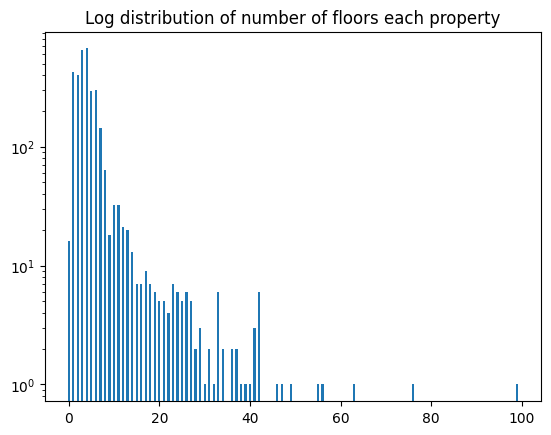

count    3211.000000
mean        4.804734
std         5.591453
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        99.000000
Name: NumberofFloors, dtype: float64

In [33]:
ft = 'NumberofFloors'
display(data[ft].value_counts())
a = data[ft].value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title('Log distribution of number of floors each property')
plt.show()
data[ft].describe()

## 2.8.  [&#9650;](#toc0_) <a id='toc2_8_'></a>Property GFA Building(s)

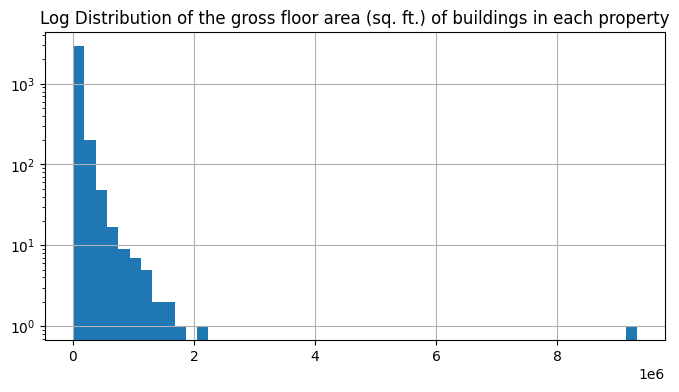

count    3.211000e+03
mean     8.743122e+04
std      2.115593e+05
min      3.636000e+03
25%      2.756350e+04
50%      4.281600e+04
75%      8.449850e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

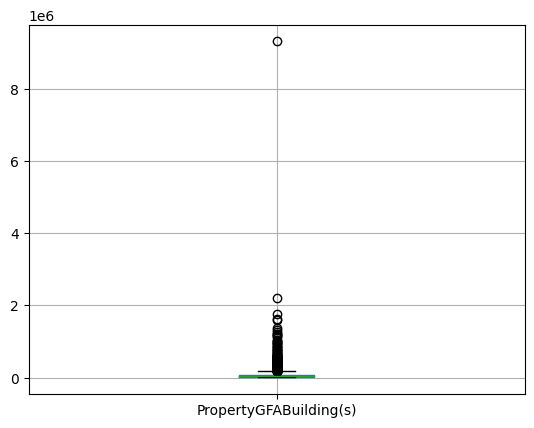

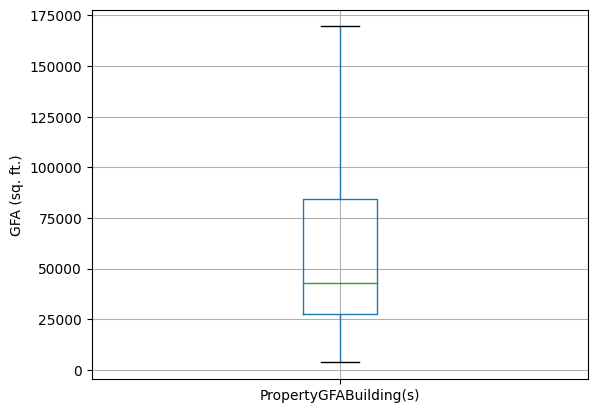

In [52]:
ft = 'PropertyGFABuilding(s)'
plt.figure(figsize=(8,4))
data[ft].hist(bins=50, log=True)
plt.title("Log Distribution of the gross floor area (sq. ft.) of buildings in each property")
plt.show()
display(data[ft].describe())
data.boxplot(ft)
plt.show()
data.boxplot(ft, showfliers=False)
plt.ylabel('GFA (sq. ft.)')
plt.show()

In [36]:
data.loc[data[ft] > 3e6]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,...,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


No surprise to find the campus as the winner in the floor area category!

In [17]:
df = data.loc[data[ft] < 3e6]

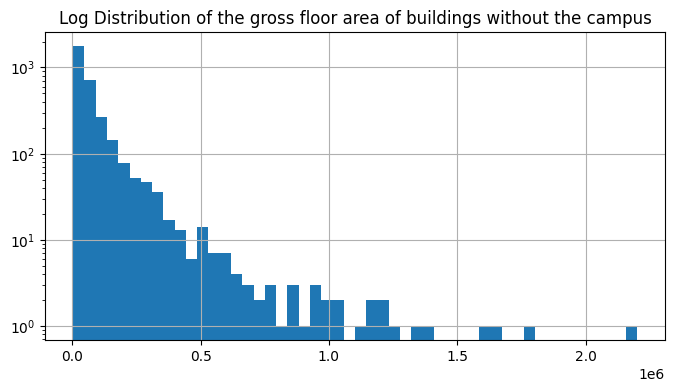

In [24]:
plt.figure(figsize=(8,4))
df[ft].hist(bins=50, log=True)
plt.title("Log Distribution of the gross floor area of buildings without the campus")
plt.show()

## ENERGYSTAR Score

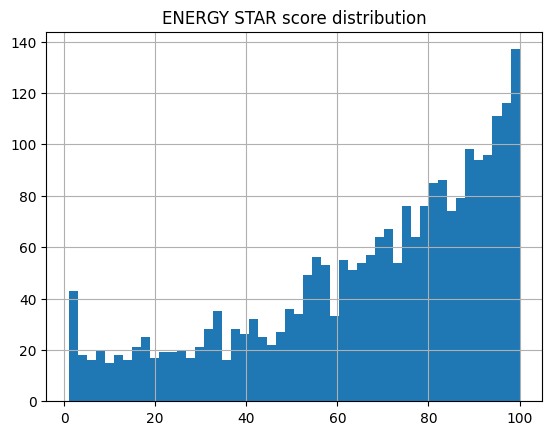

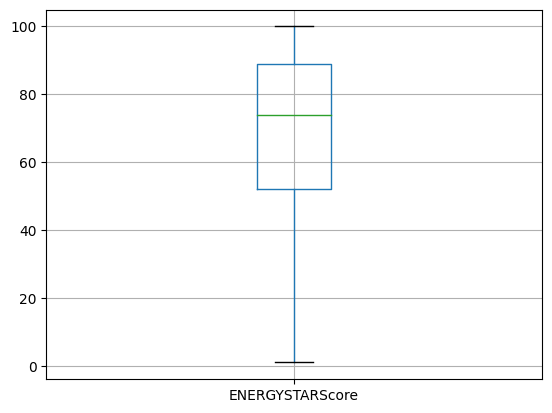

count    2399.000000
mean       67.253022
std        26.964851
min         1.000000
25%        52.000000
50%        74.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [55]:
ft = "ENERGYSTARScore"
data[ft].hist(bins=50)
plt.title('ENERGY STAR score distribution')
plt.show()
data.boxplot(ft)
plt.show()
data[ft].describe()

# Location of the properties

In [ ]:
sns.displot(data=data, x='latitude', y='longitude', hue='Primary')

Some ratios such as :

$\dfrac{PropertyUseTypeGFA}{PropertyGFATotal}$ can be interesting?